In [8]:
import numpy as np
from data_utils import load_data, categorical_to_int, create_results_dict_for
from perf_utils import aggregation_, avg_, TopPercent
from plot_utils import plot_top_cycle, plot_EF, plot_AF
from config import n_ensemble, n_init, n_est, seed_list, categories, acq_funcs
import math

# Data load and process

In [2]:
af_name, dataset_name = 'EI', 'GOQ'
unique_ds, feature_name, objective_name = load_data(
    dataset_name, invert_y=True)

print(f"##### START: {dataset_name} #####\n")
# unique_ds = categorical_to_int(
#     unique_ds, col_name='gas', categories=categories)
X_feature = unique_ds[feature_name].values
y = np.array(unique_ds[objective_name].values)
n_dataset = len(unique_ds)
# print(f"Number of data in set: {n_dataset}")

# number of top candidates, currently using top 5% of total dataset size
n_top = int(math.ceil(len(y)*.05))
top_indices = list(unique_ds.sort_values(objective_name).head(n_top).index)
print(f"length dataset: {n_dataset}, nr of top candidates: {n_top}")
unique_ds.head()

##### START: GOQ #####

length dataset: 208, nr of top candidates: 11


,power,time,gas,pressure,target
0,10,9055,Argon,580,-1.046820
1,19,2960,Nitrogen,70,-1.026473
2,44,3012,Nitrogen,70,-1.032122
3,83,8031,Air,610,0.000000
4,121,3049,Nitrogen,60,-1.046390


In [24]:
# Load ensemble calculation results from framework
# for 50 ensembles, they take some time to run
# we therefore provide sample results for BO algorithm GP_Matern52_LCB2
# please retrieve the following files from vis_demo_calc folder

# TopCodnt_collection_GP_Matern52_LCB2 = np.load('test_run.npy', allow_pickle = True)
# Please replace the above line with the below code if you ran benchmarking framework on your own dataset and obtained results locally. .
def create_results_dict_for(dataset_name: str) -> Dict[str, Any]:
    d = defaultdict(list)
    for af_name in acq_funcs:
        results = np.load(f"{af_name}_{dataset_name}.npy", allow_pickle=True)
        d[af_name] = results[3]
    return dict(d)
# test_run_results = np.load(f'{af_name}_{dataset_name}.npy', allow_pickle = True) 
# TopCount_collection_GP_Matern52_LCB2 = test_run_results[3]
# test_run_results[4]/3600
print(dataset_name, d.keys(), len(dict(d).get('PI')))

GOQ dict_keys(['EI', 'PI']) 50


In [18]:
# Aggregating the performance
TopPercent_GP_Matern52_LCB2 = avg_(TopPercent(TopCount_collection_GP_Matern52_LCB2, n_top, n_dataset))

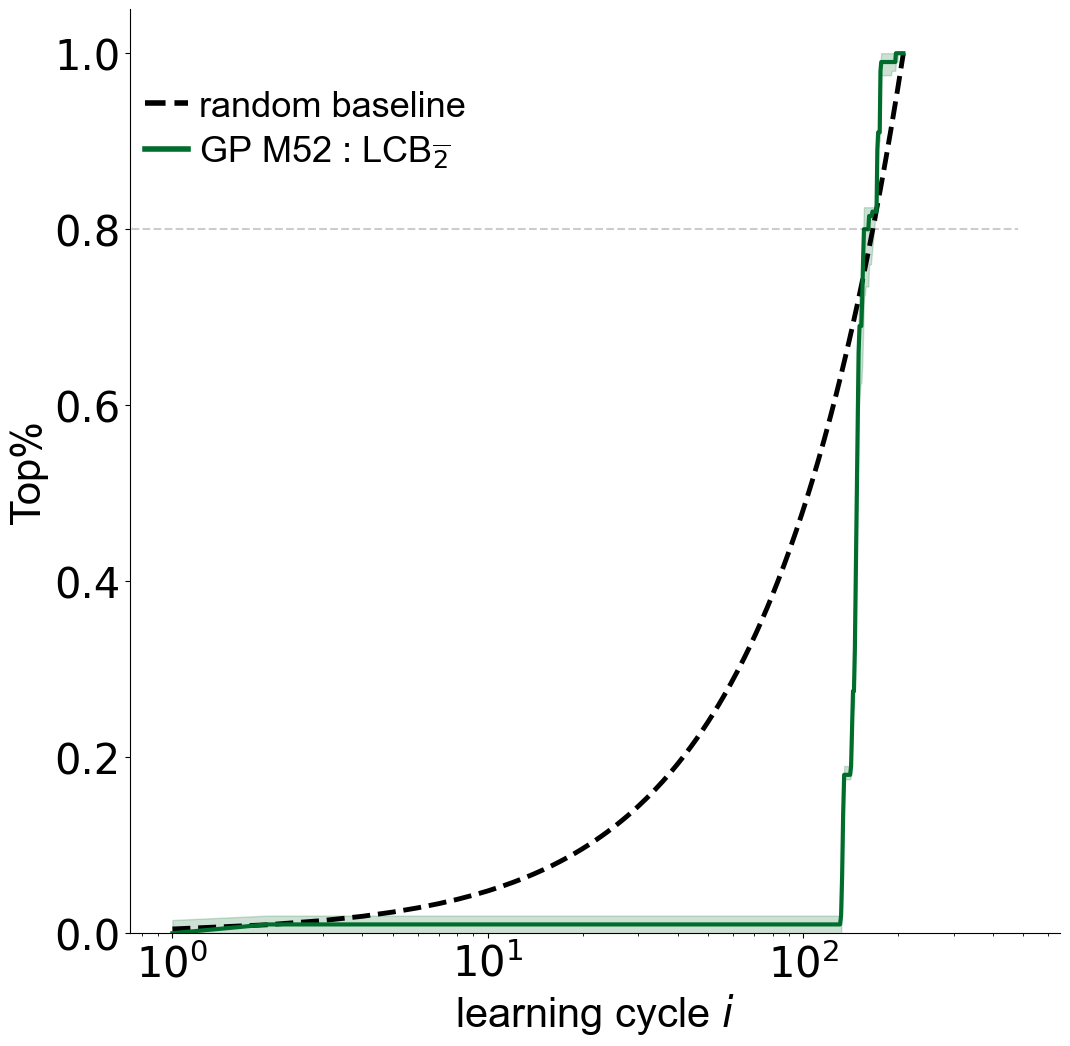

In [19]:
plot_top_cycle(n_dataset,n_top, TopPercent_GP_Matern52_LCB2, af_name, dataset_name)

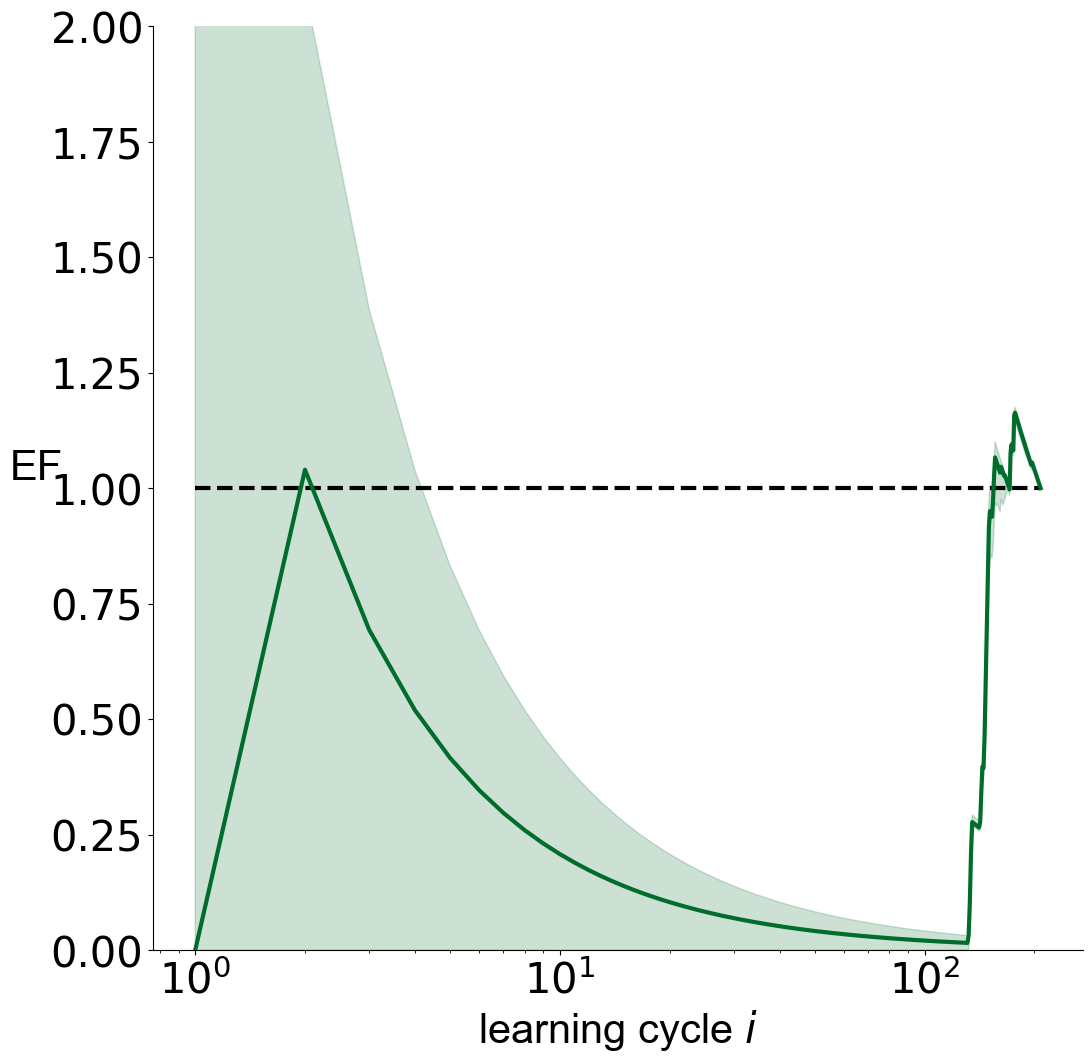

In [20]:
plot_EF(n_dataset, n_top, TopPercent_GP_Matern52_LCB2, af_name, dataset_name)

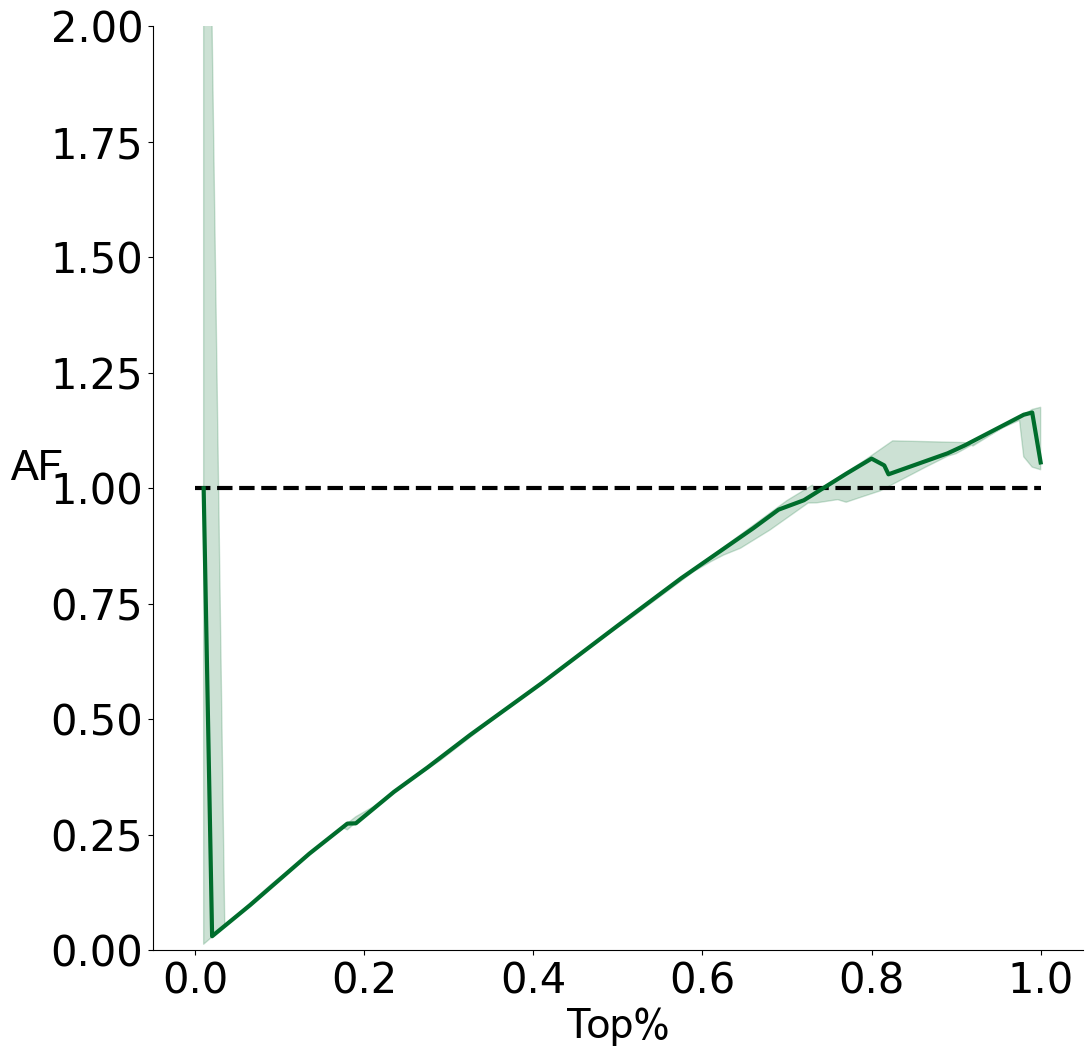

In [21]:
plot_AF(n_top, TopPercent_GP_Matern52_LCB2, af_name, dataset_name)